In [67]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [68]:
file_location = "../data/Raman_Mouse/preprocess/"
file_location2 = "../data/Raman_Mouse/preprocess_Vassilis/"

filenames = np.load(f"{file_location}FileNames.npy")
data = []
data2 = []
for f in filenames:
    data2.append(np.load(f"{file_location2}{f.split('.')[0]}_f_Reni.npy"))
    data.append(np.load(f"{file_location}{f.split('.')[0]}_raman.npy"))


In [69]:
# assume linear increase in wavelength 
wavelength = np.load(f"{file_location}Wavenumbers.npy")
wavelength2 = np.load(f"{file_location2}{filenames2[0].split('.')[0]}_wavelength.npy")
shape = data[0].shape

# raman_data = []
# photo_data = []
# for x in data:
#     tmp = copy.copy(x.reshape(-1, x.shape[-1]))
# #     tmp1 = GSP.smoothing(tmp, smooth=5, transition=10, spike_width=15)
#     tmp1, tmp2 = GSP.split_Raman_af(GSP.smoothing(tmp, smooth=5, transition=10, spike_width=15), wavelength, 7)
#     raman_data.append(tmp1)
#     photo_data.append(tmp2)

In [70]:
# #Smoothing
# x=random.randint(0,24)
# y=random.randint(0,149)
# print(x,y)

# plt.plot(wavelength, raman_data[0][x+y*25])
# plt.plot(wavelength, data[0][y,x], alpha=0.3)
# plt.show()

10 3 45


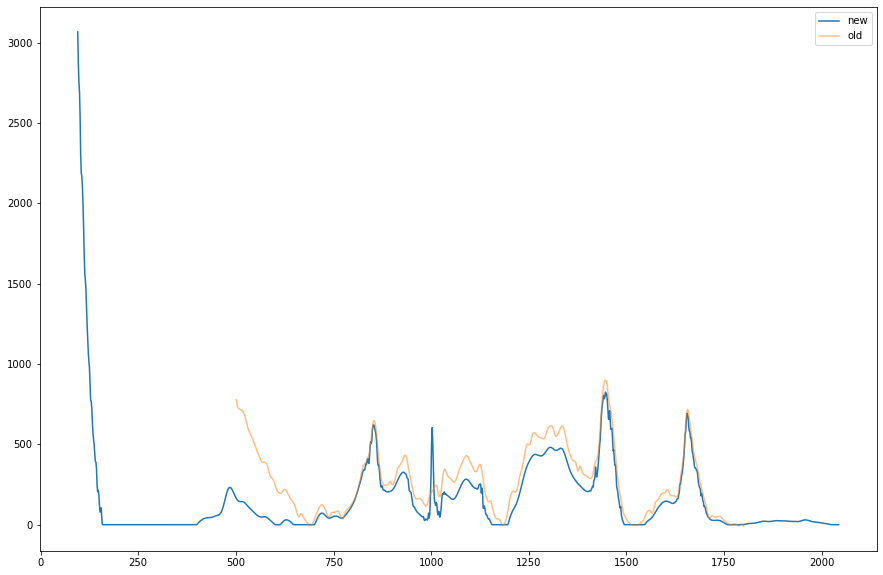

In [86]:
x=random.randint(0,24)
y=random.randint(0,149)
i=random.randint(0,50)
print(i,x,y)

plt.plot(wavelength, data[i][y,x], label='new')
plt.plot(wavelength2[:674], data2[i][y,x][:674], alpha=0.5, label='old')
plt.legend()
plt.show()

In [72]:
# #splitting
# x=random.randint(0,24)
# y=random.randint(0,149)
# print(x,y)

# plt.plot(wavelength, raman_data[0][x+y*25])
# plt.plot(wavelength, photo_data[0][x+y*25])
# plt.plot(wavelength, data[0][y,x])
# plt.plot(wavelength, data[0][y,x]-photo_data[0][x+y*25]-raman_data[0][x+y*25])
# plt.show()

In [73]:
# for i in range(0,25*150, 37):
#     plt.plot(wavelength, raman_data[0][i])
